<a href="https://colab.research.google.com/github/bmarzban/CVSmodels/blob/main/AutomaticDataFileReaderPittsPorject_all_pigs_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This python notepad will extract the area and peak for the pigs projects and automatically calculates the inital BV
- First injection
- First standard
- Second injection
- Second standard
- calculate inital BV
- calculate BV after resuscitation 


Mounted at /content/drive


No handles with labels found to put in legend.


                    file_name           Area          Peak  \
0  Subt8__4__12-22-15-787.txt  282004.984221  15153.398579   
1  Subt8__5__12-27-12-585.txt  155090.418147   8332.802013   
2  Subt8__6__12-32-11-841.txt   88189.729922   4749.932568   
3  Subt8__7__12-37-12-228.txt   59217.545075   3198.949528   
4  Subt8__8__12-42-05-191.txt   43945.362149   2396.919694   

   time_since_injection  
0                 315.0  
1                 612.0  
2                 911.0  
3                1212.0  
4                1505.0  
                    file_name           Area          Peak  \
0  Subt8__4__12-22-15-787.txt  282004.984221  15153.398579   
1  Subt8__5__12-27-12-585.txt  155090.418147   8332.802013   
2  Subt8__6__12-32-11-841.txt   88189.729922   4749.932568   
3  Subt8__7__12-37-12-228.txt   59217.545075   3198.949528   
4  Subt8__8__12-42-05-191.txt   43945.362149   2396.919694   

   time_since_injection  
0                 315.0  
1                 612.0  
2                 91

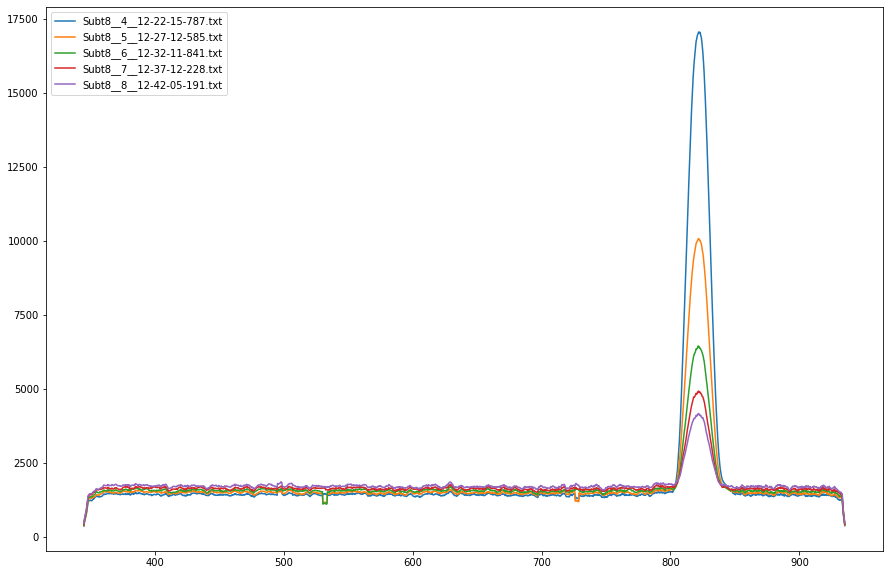

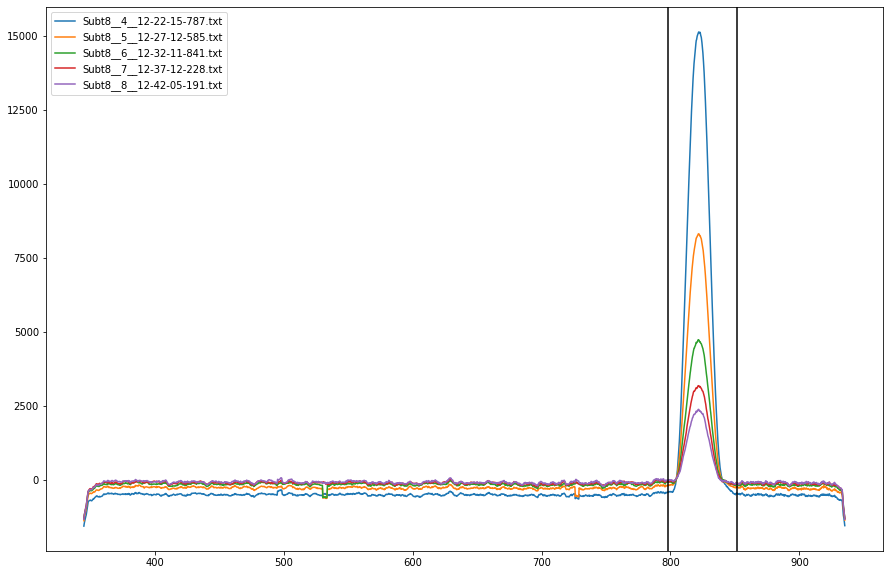

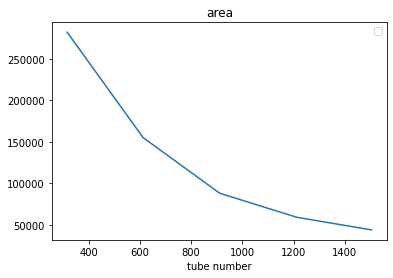

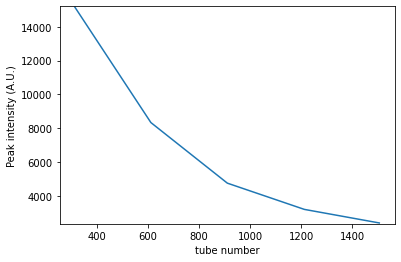

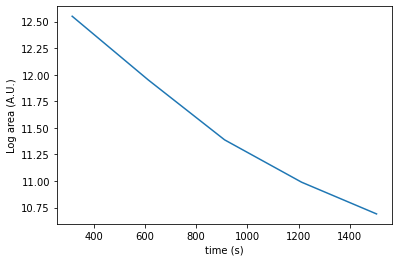

                    file_name           Area          Peak  \
0  Subt8__4__12-22-15-787.txt  282004.984221  15153.398579   
1  Subt8__5__12-27-12-585.txt  155090.418147   8332.802013   
2  Subt8__6__12-32-11-841.txt   88189.729922   4749.932568   
3  Subt8__7__12-37-12-228.txt   59217.545075   3198.949528   
4  Subt8__8__12-42-05-191.txt   43945.362149   2396.919694   

   time_since_injection  
0                 315.0  
1                 612.0  
2                 911.0  
3                1212.0  
4                1505.0  


In [1]:
import os
import glob
from google.colab import drive
from google.colab import files  
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv
import time
import datetime
from datetime import datetime
import numpy as np
from numpy import trapz
from scipy.integrate import simps
import shutil
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Daxor/ICG project/Pitt Project data/RAW DATA organized/pig 30"
#G:\My Drive\Daxor\ICG project\Pitt Project data\RAW DATA organized\pig 32
#path = "/content"
os.chdir(path)

#path = os.getcwd()
# specifying a folder for uploding the data into python workspace:
folder_name = 'first injection'
#folder_name = 'first standard'
#folder_name = 'second injection'
#folder_name = 'second standard'

first_injection_time = '12-17-00'

os.chdir(path + '/' + folder_name)

#uploaded = files.upload()
all_file_names_in_directory = os.listdir()
df = pd.DataFrame()
area_trapz_all = []
shoulder_area_trapz_all =[]
mean_far_shoulder_all = []
rfu_normalized =[]
max_rfu_normalized =  []
area_normalized_all = []
time_reading_second_since_injection_all = []
#print(all_file_names_in_directory)
for i in range(len(all_file_names_in_directory)):
  path_file_name= all_file_names_in_directory [i]
  if len(path_file_name) == 26:
    time_reading_raw = path_file_name[10:18]
  elif len(path_file_name)== 27:
    time_reading_raw = path_file_name[11:19]


  hs = (int(time_reading_raw [0:2])- int(first_injection_time[0:2])) * 3600
  ms = (int(time_reading_raw [3:5])- int(first_injection_time[3:5])) * 60
  ss = (int(time_reading_raw [6:8])- int(first_injection_time[6:8]))
  time_reading_second_since_injection = (int(time_reading_raw [0:2])- int(first_injection_time[0:2])) * 3600 + (int(time_reading_raw [3:5])- int(first_injection_time[3:5])) * 60 + (int(time_reading_raw [6:8])- int(first_injection_time[6:8]))
  time_reading_second_since_injection_all = np.append(time_reading_second_since_injection_all,time_reading_second_since_injection)
  wave_length_nm  = []
  rfu =[]
  mean_far_shoulder= []
  #print(len(lines))
  with open(path_file_name) as f:

    lines = f.readlines()
    for j in np.arange(14,len(lines),1):
  #   space_idx = np.append(space_idx,lines[i].find('\t'))
      #space_idx = lines[i].find('\t')
  #    space_idx = space_idx.astype(int)
      #print(i)
      line_single = lines[j]
      line_single_array = np.fromstring(line_single, dtype=float, sep=' ')
      #print(line_single)
      wave_length_nm = np.append(wave_length_nm,line_single_array[0])
      rfu = np.append(rfu, line_single_array[1])
    df_temp = pd.DataFrame([wave_length_nm, rfu])
    df_temp = df_temp.transpose()
    df_temp1 = pd.DataFrame()
    df = pd.concat([df,df_temp], axis= 1)    
    #area_trapz= trapz (rfu,wave_length_nm)
    area_trapz= trapz (rfu[150:1900],wave_length_nm[150:1900])
    #mean_far_shoulder = np.mean([np.mean(rfu[101:1530]) ,np.mean(rfu[1601:1968])])
    mean_far_shoulder = np.mean([np.mean(rfu[150:1530]) ,np.mean(rfu[1601:1900])])
    mean_far_shoulder_all= np.append(mean_far_shoulder_all,mean_far_shoulder)
    shoulder_area_trapz= trapz (mean_far_shoulder*np.ones(len(wave_length_nm)),wave_length_nm)
    shoulder_area_trapz_all =np.append(shoulder_area_trapz_all,shoulder_area_trapz)
    area_trapz_all=np.append(area_trapz_all,(area_trapz  -shoulder_area_trapz))
    #print(area_trapz_all)
  #rfu_np =np.fromstring(rfu)
  #print(wave_length_nm)
  #print(rfu) 
  #plt.figure(3) 
  rfu_normalized = rfu-mean_far_shoulder_all[i]
  max_rfu_normalized = np.append(max_rfu_normalized,np.max(rfu_normalized))
  plt.figure(3,figsize=(15,10))
  plt.plot(wave_length_nm,rfu, label = all_file_names_in_directory[i] )
  plt.legend()
  plt.figure(4,figsize=(15,10))
  plt.plot(wave_length_nm,rfu-mean_far_shoulder_all[i], label = all_file_names_in_directory[i] )
  plt.legend()
  area_normalized_temp =trapz(rfu_normalized[1480:1700],wave_length_nm[1480:1700])
  area_normalized_all =np.append(area_normalized_all,area_normalized_temp)
plt.axvline(x=wave_length_nm[1480], color='k', label= 'x1')
plt.axvline(x=wave_length_nm[1700], color='k', label= 'x2')
#plt.xlim([700,720])
#plt.ylim([-400,20])

extract_area_and_peak_data = pd.DataFrame()
extract_area_and_peak_data['file_name'] = all_file_names_in_directory
extract_area_and_peak_data['Area'] = area_normalized_all
extract_area_and_peak_data['Peak'] = max_rfu_normalized
extract_area_and_peak_data['time_since_injection'] = time_reading_second_since_injection_all

print(extract_area_and_peak_data)
extract_area_and_peak_data = extract_area_and_peak_data.sort_values(by=['time_since_injection'],ascending=True)
print(extract_area_and_peak_data)
#extract_area_and_peak_data.to_csv('output.csv')

tube_num = np.arange(1,len(all_file_names_in_directory)+1,1)

plt.figure()
plt.plot(extract_area_and_peak_data.time_since_injection, extract_area_and_peak_data.Area)
plt.xlabel('tube number')
plt.title('area')
plt.legend()
print(np.std(area_normalized_all))
print(np.std(area_normalized_all)/np.mean(area_normalized_all)*100)


plt.figure(7)
plt.plot(extract_area_and_peak_data.time_since_injection, extract_area_and_peak_data.Peak)
plt.xlabel('tube number')
plt.ylabel('Peak intensity (A.U.)')
plt.ylim([np.min(max_rfu_normalized) - 50,np.max(max_rfu_normalized)+50])

plt.figure(8)
plt.plot(extract_area_and_peak_data.time_since_injection, np.log(extract_area_and_peak_data.Area))
plt.xlabel('time (s)')
plt.ylabel('Log area (A.U.)')
#plt.ylim([np.min(max_rfu_normalized) - 50,np.max(max_rfu_normalized)+50])
plt.show()

extract_area_and_peak_data_first_injection = extract_area_and_peak_data
print(extract_area_and_peak_data_first_injection)

## first standard

No handles with labels found to put in legend.


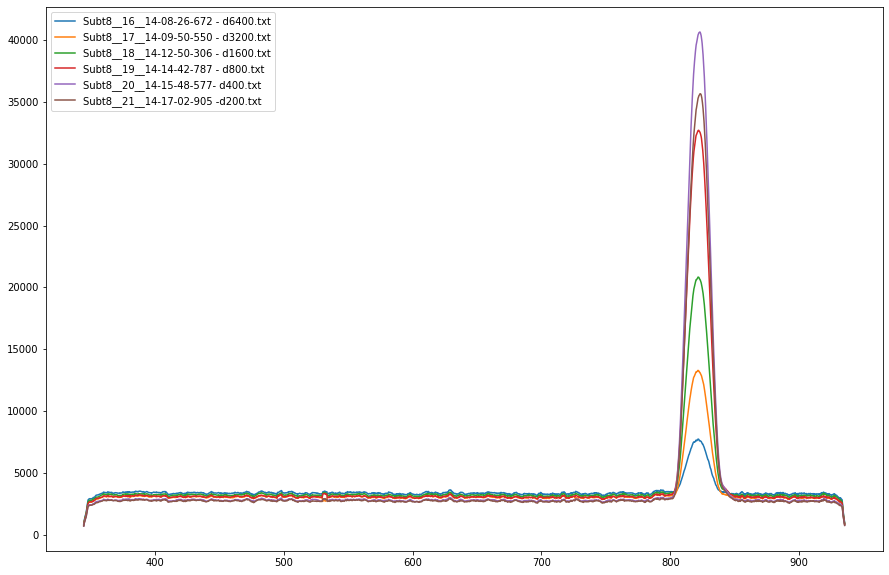

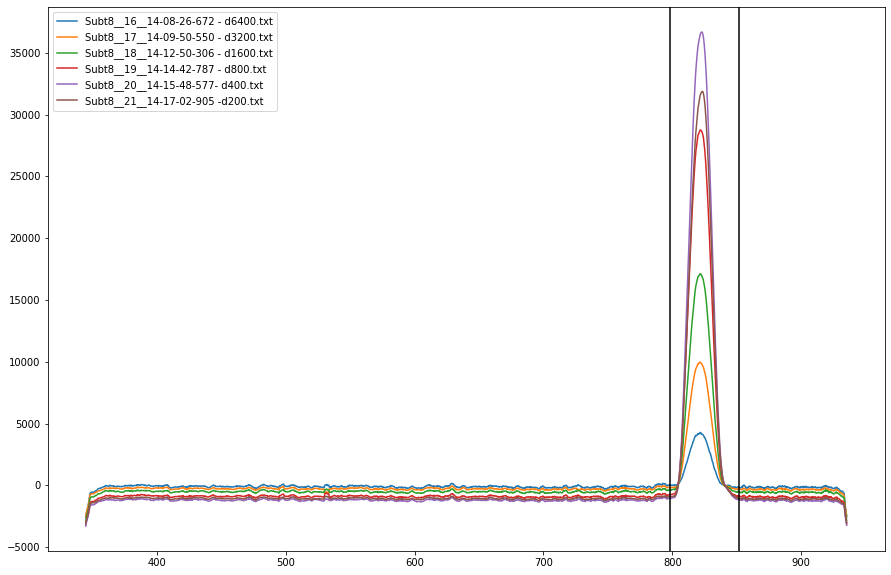

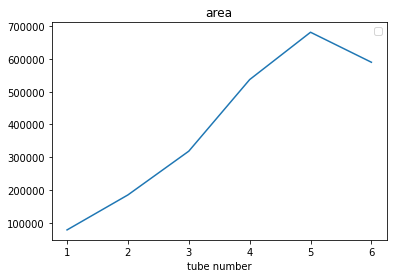

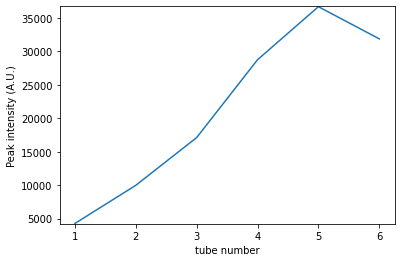

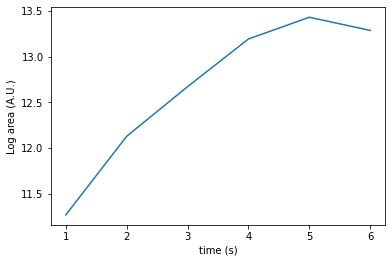

                             file_name           Area          Peak  dilution
0  Subt8__16__14-08-26-672 - d6400.txt   78214.652619   4276.204173    6400.0
1  Subt8__17__14-09-50-550 - d3200.txt  184982.340527   9981.094146    3200.0
2  Subt8__18__14-12-50-306 - d1600.txt  318478.686108  17123.152987    1600.0
3   Subt8__19__14-14-42-787 - d800.txt  536839.684688  28763.644696     800.0
4    Subt8__20__14-15-48-577- d400.txt  681313.618015  36694.942102     400.0
5    Subt8__21__14-17-02-905 -d200.txt  589726.535344  31883.958863     200.0


In [2]:
# specifying a folder for uploding the data into python workspace:
folder_name = 'first standard'

os.chdir(path + '/' + folder_name)

#uploaded = files.upload()
all_file_names_in_directory = os.listdir()
df = pd.DataFrame()
area_trapz_all = []
shoulder_area_trapz_all =[]
mean_far_shoulder_all = []
rfu_normalized =[]
max_rfu_normalized =  []
area_normalized_all = []
dilution_all = []
#print(all_file_names_in_directory)
for i in range(len(all_file_names_in_directory)):
  path_file_name= all_file_names_in_directory [i]
  dilution_index_finder = path_file_name.find('d')
  temp_dilution_string = path_file_name[(dilution_index_finder+1):(dilution_index_finder+5)]
  if temp_dilution_string[-1] == '.':
    temp_dilution_string = temp_dilution_string[0:3]
    
  dilution_all = np.append(dilution_all,int(temp_dilution_string))
  #print(dilution_all)
  wave_length_nm  = []
  rfu =[]
  mean_far_shoulder= []

  with open(path_file_name) as f:

    lines = f.readlines()
    for j in np.arange(14,len(lines),1):

      line_single = lines[j]
      line_single_array = np.fromstring(line_single, dtype=float, sep=' ')
      #print(line_single)
      wave_length_nm = np.append(wave_length_nm,line_single_array[0])
      rfu = np.append(rfu, line_single_array[1])
    df_temp = pd.DataFrame([wave_length_nm, rfu])
    df_temp = df_temp.transpose()
    df_temp1 = pd.DataFrame()
    df = pd.concat([df,df_temp], axis= 1)    
    #area_trapz= trapz (rfu,wave_length_nm)
    area_trapz= trapz (rfu[150:1900],wave_length_nm[150:1900])
    #mean_far_shoulder = np.mean([np.mean(rfu[101:1530]) ,np.mean(rfu[1601:1968])])
    mean_far_shoulder = np.mean([np.mean(rfu[150:1530]) ,np.mean(rfu[1601:1900])])
    mean_far_shoulder_all= np.append(mean_far_shoulder_all,mean_far_shoulder)
    shoulder_area_trapz= trapz (mean_far_shoulder*np.ones(len(wave_length_nm)),wave_length_nm)
    shoulder_area_trapz_all =np.append(shoulder_area_trapz_all,shoulder_area_trapz)
    area_trapz_all=np.append(area_trapz_all,(area_trapz  -shoulder_area_trapz))

  rfu_normalized = rfu-mean_far_shoulder_all[i]
  max_rfu_normalized = np.append(max_rfu_normalized,np.max(rfu_normalized))
  plt.figure(3,figsize=(15,10))
  plt.plot(wave_length_nm,rfu, label = all_file_names_in_directory[i] )
  plt.legend()
  plt.figure(4,figsize=(15,10))
  plt.plot(wave_length_nm,rfu-mean_far_shoulder_all[i], label = all_file_names_in_directory[i] )
  plt.legend()
  area_normalized_temp =trapz(rfu_normalized[1480:1700],wave_length_nm[1480:1700])
  area_normalized_all =np.append(area_normalized_all,area_normalized_temp)
plt.axvline(x=wave_length_nm[1480], color='k', label= 'x1')
plt.axvline(x=wave_length_nm[1700], color='k', label= 'x2')
#plt.xlim([700,720])
#plt.ylim([-400,20])

extract_area_and_peak_data = pd.DataFrame()
extract_area_and_peak_data['file_name'] = all_file_names_in_directory
extract_area_and_peak_data['Area'] = area_normalized_all
extract_area_and_peak_data['Peak'] = max_rfu_normalized
extract_area_and_peak_data['dilution'] = dilution_all


extract_area_and_peak_data = extract_area_and_peak_data.sort_values(by=['dilution'],ascending=False)
#extract_area_and_peak_data.to_csv('output.csv')

tube_num = np.arange(1,len(all_file_names_in_directory)+1,1)

plt.figure()
plt.plot(tube_num, extract_area_and_peak_data.Area)
plt.xlabel('tube number')
plt.title('area')
plt.legend()


plt.figure(7)
plt.plot(tube_num, extract_area_and_peak_data.Peak)
plt.xlabel('tube number')
plt.ylabel('Peak intensity (A.U.)')
plt.ylim([np.min(max_rfu_normalized) - 50,np.max(max_rfu_normalized)+50])

plt.figure(8)
plt.plot(tube_num, np.log(extract_area_and_peak_data.Area))
plt.xlabel('time (s)')
plt.ylabel('Log area (A.U.)')
#plt.ylim([np.min(max_rfu_normalized) - 50,np.max(max_rfu_normalized)+50])
plt.show()

extract_area_and_peak_data_first_standard = extract_area_and_peak_data
print(extract_area_and_peak_data_first_standard)



## finding the un adjusted blood volume for each reading
# we fit a linear line for each area under the curve and assuming we are in the linear phase


In [3]:
# for each area we look for a 
#The corresponding higher dillution on the standard curve =
volume_injected = 4 # unit mL
conc_injected = 5 # mg/ml
conc_original_solution = 5 # 5 mg/ml
# or total 20 mg of ICG injected
unadjusted_BV_all = []
for i in range(len(extract_area_and_peak_data_first_injection.Area)):
  temp_area_index_finder = extract_area_and_peak_data_first_injection.Area[i] - extract_area_and_peak_data_first_standard.Area
  # detecting the sign change
  change_sign_index = np.where((temp_area_index_finder>0)== True)[0]
  if len(change_sign_index)>0:
    temp_index = len(change_sign_index)
    
    high_dilution_standard =  extract_area_and_peak_data_first_standard.dilution[temp_index]
    low_dilution_standard = extract_area_and_peak_data_first_standard.dilution[temp_index-1]
    RFU_high_dilution_standard = extract_area_and_peak_data_first_standard.Area[temp_index]
    RFU_low_dilution_standard = 	extract_area_and_peak_data_first_standard.Area[temp_index-1]
    #RFU reading after 5 minutes = 
    RFU_reading_post_injection = extract_area_and_peak_data_first_injection.Area[i]
    print(RFU_reading_post_injection)
    # extracting the corresponding dilution
    dilution_post_injection = low_dilution_standard + (high_dilution_standard - low_dilution_standard)/(RFU_high_dilution_standard - RFU_low_dilution_standard) *(RFU_reading_post_injection - RFU_low_dilution_standard) 
    concen_post_injection = conc_original_solution/dilution_post_injection
    blood_volume_post_injection = (volume_injected * conc_injected)/concen_post_injection
    print('unadjusted BV for this PIG 1 minutes after injection  (ml): ')
    print(blood_volume_post_injection)
    #this is 5 minutes post injection, therefore we could conclude at the time of injection we observe something less than half 
    #because half life is less than 5
    unadjusted_BV_all = np.append(unadjusted_BV_all,blood_volume_post_injection)
  else:
    unadjusted_BV_all = np.append(unadjusted_BV_all,np.nan)

print(unadjusted_BV_all)
extract_area_and_peak_data_first_injection['unadjusted BV (mL)'] = unadjusted_BV_all
print(extract_area_and_peak_data_first_injection)

282004.9842211146
unadjusted BV for this PIG 1 minutes after injection  (ml): 
8148.599866618569
155090.41814706413
unadjusted BV for this PIG 1 minutes after injection  (ml): 
16383.636715960427
88189.72992162264
unadjusted BV for this PIG 1 minutes after injection  (ml): 
24404.123307569796
[ 8148.59986662 16383.63671596 24404.12330757            nan
            nan]
                    file_name           Area          Peak  \
0  Subt8__4__12-22-15-787.txt  282004.984221  15153.398579   
1  Subt8__5__12-27-12-585.txt  155090.418147   8332.802013   
2  Subt8__6__12-32-11-841.txt   88189.729922   4749.932568   
3  Subt8__7__12-37-12-228.txt   59217.545075   3198.949528   
4  Subt8__8__12-42-05-191.txt   43945.362149   2396.919694   

   time_since_injection  unadjusted BV (mL)  
0                 315.0         8148.599867  
1                 612.0        16383.636716  
2                 911.0        24404.123308  
3                1212.0                 NaN  
4                1505.0  

## second injection


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


No handles with labels found to put in legend.


                     file_name          Area         Peak  \
0  Subt8__29__16-34-20-220.txt  64569.824662  3541.227437   
1  Subt8__30__16-45-20-018.txt  16444.731420   950.212785   
2  Subt8__31__16-50-19-223.txt  10114.619560   614.483174   
3  Subt8__32__16-55-20-493.txt   6580.412091   443.998367   
4  Subt8__33__17-06-20-927.txt   2524.491411   303.855714   
5  Subt8__34__17-11-26-282.txt   1844.727292   324.099700   
6  Subt8__35__17-17-01-534.txt   2594.297029   318.525591   
7  Subt8__36__17-21-22-820.txt   1486.660349   333.515378   
8  Subt8__37__17-26-11-470.txt    409.055188   316.136064   

   time_since_injection  
0                 740.0  
1                1400.0  
2                1699.0  
3                2000.0  
4                2660.0  
5                2966.0  
6                3301.0  
7                3562.0  
8                3851.0  
                     file_name          Area         Peak  \
0  Subt8__29__16-34-20-220.txt  64569.824662  3541.227437   
1  Subt

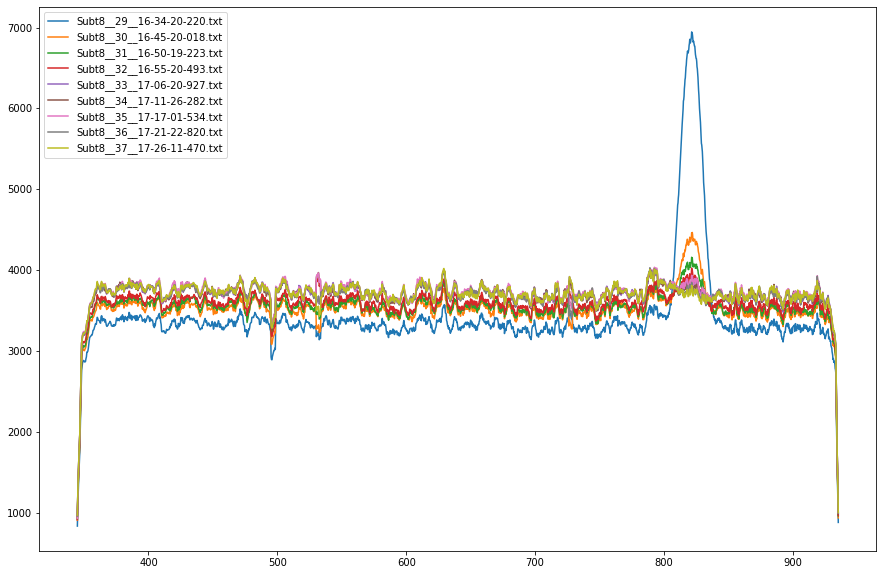

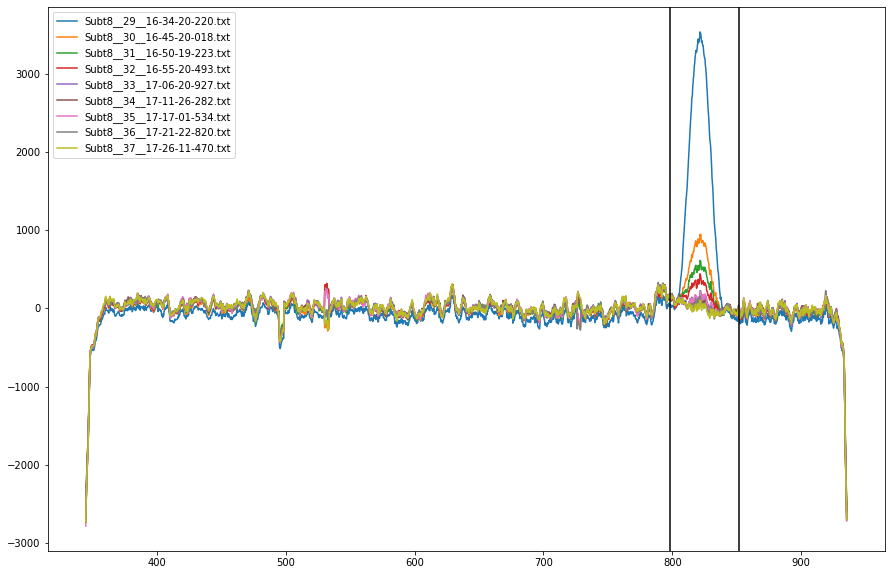

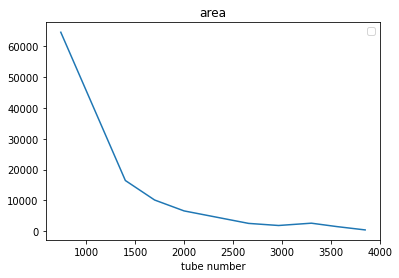

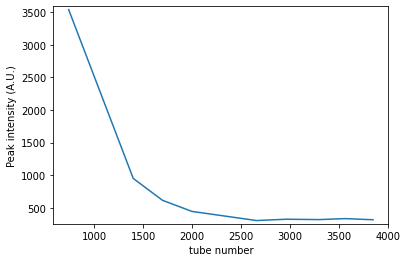

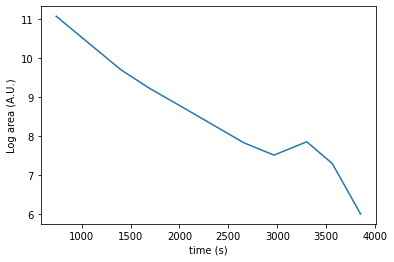

                     file_name          Area         Peak  \
0  Subt8__29__16-34-20-220.txt  64569.824662  3541.227437   
1  Subt8__30__16-45-20-018.txt  16444.731420   950.212785   
2  Subt8__31__16-50-19-223.txt  10114.619560   614.483174   
3  Subt8__32__16-55-20-493.txt   6580.412091   443.998367   
4  Subt8__33__17-06-20-927.txt   2524.491411   303.855714   
5  Subt8__34__17-11-26-282.txt   1844.727292   324.099700   
6  Subt8__35__17-17-01-534.txt   2594.297029   318.525591   
7  Subt8__36__17-21-22-820.txt   1486.660349   333.515378   
8  Subt8__37__17-26-11-470.txt    409.055188   316.136064   

   time_since_injection  
0                 740.0  
1                1400.0  
2                1699.0  
3                2000.0  
4                2660.0  
5                2966.0  
6                3301.0  
7                3562.0  
8                3851.0  


In [5]:
import os
import glob
from google.colab import drive
from google.colab import files  
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv
import time
import datetime
from datetime import datetime
import numpy as np
from numpy import trapz
from scipy.integrate import simps
import shutil
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Daxor/ICG project/Pitt Project data/RAW DATA organized/pig 30"
#G:\My Drive\Daxor\ICG project\Pitt Project data\RAW DATA organized\pig 32
#path = "/content"
os.chdir(path)

#path = os.getcwd()
# specifying a folder for uploding the data into python workspace:
#folder_name = 'first injection'
#folder_name = 'first standard'
folder_name = 'second injection'
#folder_name = 'second standard'

second_injection_time = '16-22-00'

os.chdir(path + '/' + folder_name)

#uploaded = files.upload()
all_file_names_in_directory = os.listdir()
df = pd.DataFrame()
area_trapz_all = []
shoulder_area_trapz_all =[]
mean_far_shoulder_all = []
rfu_normalized =[]
max_rfu_normalized =  []
area_normalized_all = []
time_reading_second_since_injection_all = []
#print(all_file_names_in_directory)
for i in range(len(all_file_names_in_directory)):
  #path_file_name= path +  "/" + all_file_names_in_directory [i]
  path_file_name= all_file_names_in_directory [i]
 
  if len(path_file_name) == 26:
    time_reading_raw = path_file_name[10:18]
  elif len(path_file_name)== 27:
    time_reading_raw = path_file_name[11:19]
  
  hs = (int(time_reading_raw [0:2])- int(second_injection_time[0:2])) * 3600
  ms = (int(time_reading_raw [3:5])- int(second_injection_time[3:5])) * 60
  ss = (int(time_reading_raw [6:8])- int(second_injection_time[6:8]))
  time_reading_second_since_injection = (int(time_reading_raw [0:2])- int(second_injection_time[0:2])) * 3600 + (int(time_reading_raw [3:5])- int(second_injection_time[3:5])) * 60 + (int(time_reading_raw [6:8])- int(second_injection_time[6:8]))
  time_reading_second_since_injection_all = np.append(time_reading_second_since_injection_all,time_reading_second_since_injection)
  wave_length_nm  = []
  rfu =[]
  mean_far_shoulder= []
  #print(len(lines))
  with open(path_file_name) as f:

    lines = f.readlines()
    for j in np.arange(14,len(lines),1):
  #   space_idx = np.append(space_idx,lines[i].find('\t'))
      #space_idx = lines[i].find('\t')
  #    space_idx = space_idx.astype(int)
      #print(i)
      line_single = lines[j]
      line_single_array = np.fromstring(line_single, dtype=float, sep=' ')
      #print(line_single)
      wave_length_nm = np.append(wave_length_nm,line_single_array[0])
      rfu = np.append(rfu, line_single_array[1])
    df_temp = pd.DataFrame([wave_length_nm, rfu])
    df_temp = df_temp.transpose()
    df_temp1 = pd.DataFrame()
    df = pd.concat([df,df_temp], axis= 1)    
    #area_trapz= trapz (rfu,wave_length_nm)
    area_trapz= trapz (rfu[150:1900],wave_length_nm[150:1900])
    #mean_far_shoulder = np.mean([np.mean(rfu[101:1530]) ,np.mean(rfu[1601:1968])])
    mean_far_shoulder = np.mean([np.mean(rfu[150:1530]) ,np.mean(rfu[1601:1900])])
    mean_far_shoulder_all= np.append(mean_far_shoulder_all,mean_far_shoulder)
    shoulder_area_trapz= trapz (mean_far_shoulder*np.ones(len(wave_length_nm)),wave_length_nm)
    shoulder_area_trapz_all =np.append(shoulder_area_trapz_all,shoulder_area_trapz)
    area_trapz_all=np.append(area_trapz_all,(area_trapz  -shoulder_area_trapz))
    #print(area_trapz_all)
  #rfu_np =np.fromstring(rfu)
  #print(wave_length_nm)
  #print(rfu) 
  #plt.figure(3) 
  rfu_normalized = rfu-mean_far_shoulder_all[i]
  max_rfu_normalized = np.append(max_rfu_normalized,np.max(rfu_normalized))
  plt.figure(3,figsize=(15,10))
  plt.plot(wave_length_nm,rfu, label = all_file_names_in_directory[i] )
  plt.legend()
  plt.figure(4,figsize=(15,10))
  plt.plot(wave_length_nm,rfu-mean_far_shoulder_all[i], label = all_file_names_in_directory[i] )
  plt.legend()
  area_normalized_temp =trapz(rfu_normalized[1480:1700],wave_length_nm[1480:1700])
  area_normalized_all =np.append(area_normalized_all,area_normalized_temp)
plt.axvline(x=wave_length_nm[1480], color='k', label= 'x1')
plt.axvline(x=wave_length_nm[1700], color='k', label= 'x2')
#plt.xlim([700,720])
#plt.ylim([-400,20])

extract_area_and_peak_data = pd.DataFrame()
extract_area_and_peak_data['file_name'] = all_file_names_in_directory
extract_area_and_peak_data['Area'] = area_normalized_all
extract_area_and_peak_data['Peak'] = max_rfu_normalized
extract_area_and_peak_data['time_since_injection'] = time_reading_second_since_injection_all

print(extract_area_and_peak_data)
extract_area_and_peak_data = extract_area_and_peak_data.sort_values(by=['time_since_injection'],ascending=True)
print(extract_area_and_peak_data)
#extract_area_and_peak_data.to_csv('output.csv')

tube_num = np.arange(1,len(all_file_names_in_directory)+1,1)

plt.figure()
plt.plot(extract_area_and_peak_data.time_since_injection, extract_area_and_peak_data.Area)
plt.xlabel('tube number')
plt.title('area')
plt.legend()
print(np.std(area_normalized_all))
print(np.std(area_normalized_all)/np.mean(area_normalized_all)*100)


plt.figure(7)
plt.plot(extract_area_and_peak_data.time_since_injection, extract_area_and_peak_data.Peak)
plt.xlabel('tube number')
plt.ylabel('Peak intensity (A.U.)')
plt.ylim([np.min(max_rfu_normalized) - 50,np.max(max_rfu_normalized)+50])

plt.figure(8)
plt.plot(extract_area_and_peak_data.time_since_injection, np.log(extract_area_and_peak_data.Area))
plt.xlabel('time (s)')
plt.ylabel('Log area (A.U.)')
#plt.ylim([np.min(max_rfu_normalized) - 50,np.max(max_rfu_normalized)+50])
plt.show()

extract_area_and_peak_data_first_injection = extract_area_and_peak_data
print(extract_area_and_peak_data_first_injection)

##second standard


No handles with labels found to put in legend.


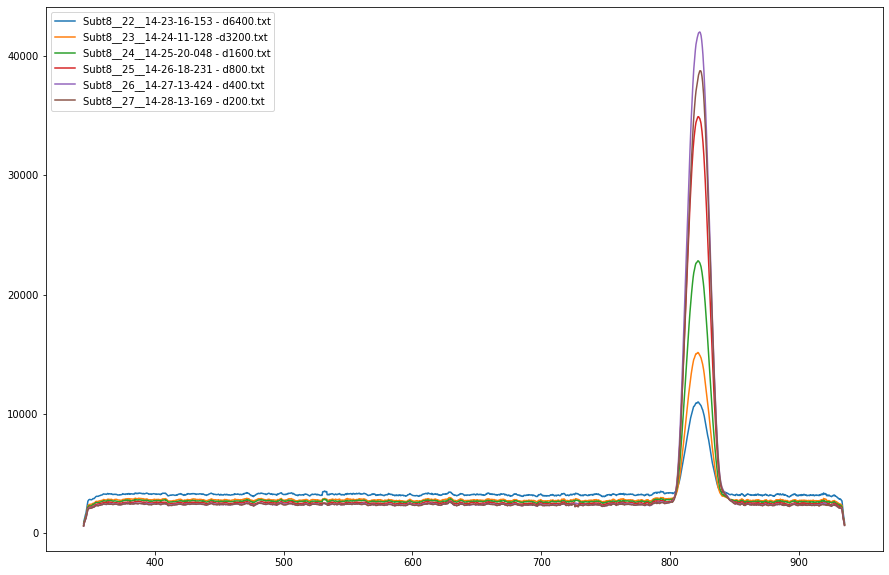

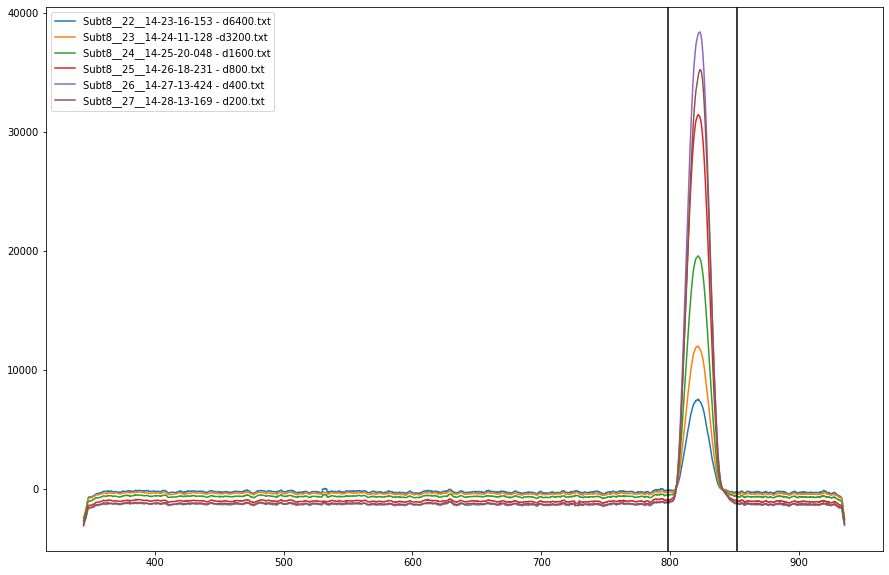

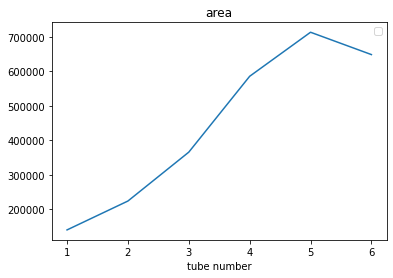

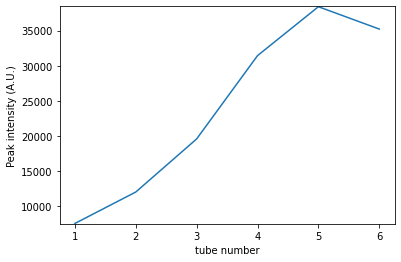

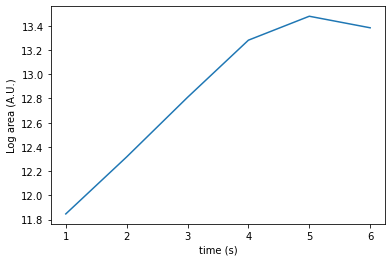

                             file_name           Area          Peak  dilution
0  Subt8__22__14-23-16-153 - d6400.txt  139683.101646   7560.217001    6400.0
1   Subt8__23__14-24-11-128 -d3200.txt  223586.928169  12031.095363    3200.0
2  Subt8__24__14-25-20-048 - d1600.txt  365571.803654  19583.414565    1600.0
3   Subt8__25__14-26-18-231 - d800.txt  585892.686038  31430.806962     800.0
4   Subt8__26__14-27-13-424 - d400.txt  713825.448549  38386.215150     400.0
5   Subt8__27__14-28-13-169 - d200.txt  648929.793933  35207.357598     200.0


In [6]:
#second standard
# specifying a folder for uploding the data into python workspace:
folder_name = 'second standard'

os.chdir(path + '/' + folder_name)

#uploaded = files.upload()
all_file_names_in_directory = os.listdir()
df = pd.DataFrame()
area_trapz_all = []
shoulder_area_trapz_all =[]
mean_far_shoulder_all = []
rfu_normalized =[]
max_rfu_normalized =  []
area_normalized_all = []
dilution_all = []
#print(all_file_names_in_directory)
for i in range(len(all_file_names_in_directory)):
  path_file_name= all_file_names_in_directory [i]
  dilution_index_finder = path_file_name.find('d')
  temp_dilution_string = path_file_name[(dilution_index_finder+1):(dilution_index_finder+5)]
  if temp_dilution_string[-1] == '.':
    temp_dilution_string = temp_dilution_string[0:3]
    
  dilution_all = np.append(dilution_all,int(temp_dilution_string))
  #print(dilution_all)
  wave_length_nm  = []
  rfu =[]
  mean_far_shoulder= []

  with open(path_file_name) as f:

    lines = f.readlines()
    for j in np.arange(14,len(lines),1):

      line_single = lines[j]
      line_single_array = np.fromstring(line_single, dtype=float, sep=' ')
      #print(line_single)
      wave_length_nm = np.append(wave_length_nm,line_single_array[0])
      rfu = np.append(rfu, line_single_array[1])
    df_temp = pd.DataFrame([wave_length_nm, rfu])
    df_temp = df_temp.transpose()
    df_temp1 = pd.DataFrame()
    df = pd.concat([df,df_temp], axis= 1)    
    #area_trapz= trapz (rfu,wave_length_nm)
    area_trapz= trapz (rfu[150:1900],wave_length_nm[150:1900])
    #mean_far_shoulder = np.mean([np.mean(rfu[101:1530]) ,np.mean(rfu[1601:1968])])
    mean_far_shoulder = np.mean([np.mean(rfu[150:1530]) ,np.mean(rfu[1601:1900])])
    mean_far_shoulder_all= np.append(mean_far_shoulder_all,mean_far_shoulder)
    shoulder_area_trapz= trapz (mean_far_shoulder*np.ones(len(wave_length_nm)),wave_length_nm)
    shoulder_area_trapz_all =np.append(shoulder_area_trapz_all,shoulder_area_trapz)
    area_trapz_all=np.append(area_trapz_all,(area_trapz  -shoulder_area_trapz))

  rfu_normalized = rfu-mean_far_shoulder_all[i]
  max_rfu_normalized = np.append(max_rfu_normalized,np.max(rfu_normalized))
  plt.figure(3,figsize=(15,10))
  plt.plot(wave_length_nm,rfu, label = all_file_names_in_directory[i] )
  plt.legend()
  plt.figure(4,figsize=(15,10))
  plt.plot(wave_length_nm,rfu-mean_far_shoulder_all[i], label = all_file_names_in_directory[i] )
  plt.legend()
  area_normalized_temp =trapz(rfu_normalized[1480:1700],wave_length_nm[1480:1700])
  area_normalized_all =np.append(area_normalized_all,area_normalized_temp)
plt.axvline(x=wave_length_nm[1480], color='k', label= 'x1')
plt.axvline(x=wave_length_nm[1700], color='k', label= 'x2')
#plt.xlim([700,720])
#plt.ylim([-400,20])

extract_area_and_peak_data = pd.DataFrame()
extract_area_and_peak_data['file_name'] = all_file_names_in_directory
extract_area_and_peak_data['Area'] = area_normalized_all
extract_area_and_peak_data['Peak'] = max_rfu_normalized
extract_area_and_peak_data['dilution'] = dilution_all


extract_area_and_peak_data = extract_area_and_peak_data.sort_values(by=['dilution'],ascending=False)
#extract_area_and_peak_data.to_csv('output.csv')

tube_num = np.arange(1,len(all_file_names_in_directory)+1,1)

plt.figure()
plt.plot(tube_num, extract_area_and_peak_data.Area)
plt.xlabel('tube number')
plt.title('area')
plt.legend()


plt.figure(7)
plt.plot(tube_num, extract_area_and_peak_data.Peak)
plt.xlabel('tube number')
plt.ylabel('Peak intensity (A.U.)')
plt.ylim([np.min(max_rfu_normalized) - 50,np.max(max_rfu_normalized)+50])

plt.figure(8)
plt.plot(tube_num, np.log(extract_area_and_peak_data.Area))
plt.xlabel('time (s)')
plt.ylabel('Log area (A.U.)')
#plt.ylim([np.min(max_rfu_normalized) - 50,np.max(max_rfu_normalized)+50])
plt.show()

extract_area_and_peak_data_first_standard = extract_area_and_peak_data
print(extract_area_and_peak_data_first_standard)




##Un adjusted BV calculations for the second injection

In [7]:
# for each area we look for a 
#The corresponding higher dillution on the standard curve =
volume_injected = 4 # unit mL
conc_injected = 5 # mg/ml
conc_original_solution = 5 # 5 mg/ml
# or total 20 mg of ICG injected
unadjusted_BV_all = []
for i in range(len(extract_area_and_peak_data_first_injection.Area)):
  temp_area_index_finder = extract_area_and_peak_data_first_injection.Area[i] - extract_area_and_peak_data_first_standard.Area
  # detecting the sign change
  change_sign_index = np.where((temp_area_index_finder>0)== True)[0]
  if len(change_sign_index)>0:
    temp_index = len(change_sign_index)
    
    high_dilution_standard =  extract_area_and_peak_data_first_standard.dilution[temp_index]
    low_dilution_standard = extract_area_and_peak_data_first_standard.dilution[temp_index-1]
    RFU_high_dilution_standard = extract_area_and_peak_data_first_standard.Area[temp_index]
    RFU_low_dilution_standard = 	extract_area_and_peak_data_first_standard.Area[temp_index-1]
    #RFU reading after 5 minutes = 
    RFU_reading_post_injection = extract_area_and_peak_data_first_injection.Area[i]
    print(RFU_reading_post_injection)
    # extracting the corresponding dilution
    dilution_post_injection = low_dilution_standard + (high_dilution_standard - low_dilution_standard)/(RFU_high_dilution_standard - RFU_low_dilution_standard) *(RFU_reading_post_injection - RFU_low_dilution_standard) 
    concen_post_injection = conc_original_solution/dilution_post_injection
    blood_volume_post_injection = (volume_injected * conc_injected)/concen_post_injection
    print('unadjusted BV for this PIG 1 minutes after injection  (ml): ')
    print(blood_volume_post_injection)
    #this is 5 minutes post injection, therefore we could conclude at the time of injection we observe something less than half 
    #because half life is less than 5
    unadjusted_BV_all = np.append(unadjusted_BV_all,blood_volume_post_injection)
  else:
    unadjusted_BV_all = np.append(unadjusted_BV_all,np.nan)

print(unadjusted_BV_all)
extract_area_and_peak_data_first_injection['unadjusted BV (mL)'] = unadjusted_BV_all
print(extract_area_and_peak_data_first_injection)

[nan nan nan nan nan nan nan nan nan]
                     file_name          Area         Peak  \
0  Subt8__29__16-34-20-220.txt  64569.824662  3541.227437   
1  Subt8__30__16-45-20-018.txt  16444.731420   950.212785   
2  Subt8__31__16-50-19-223.txt  10114.619560   614.483174   
3  Subt8__32__16-55-20-493.txt   6580.412091   443.998367   
4  Subt8__33__17-06-20-927.txt   2524.491411   303.855714   
5  Subt8__34__17-11-26-282.txt   1844.727292   324.099700   
6  Subt8__35__17-17-01-534.txt   2594.297029   318.525591   
7  Subt8__36__17-21-22-820.txt   1486.660349   333.515378   
8  Subt8__37__17-26-11-470.txt    409.055188   316.136064   

   time_since_injection  unadjusted BV (mL)  
0                 740.0                 NaN  
1                1400.0                 NaN  
2                1699.0                 NaN  
3                2000.0                 NaN  
4                2660.0                 NaN  
5                2966.0                 NaN  
6                3301.0      

a quick BV calculator code given the injected volume v1 using c1v1 = c2v2 formula

for instance for pig 30 first injection

Calculating the BV using C1 * V1 = C2 * V2:


 dlitution          		Area          			Peak
 3200 		184982.340527   	9981.094146
1600		 	318478.686108  		17123.152987


From first table 5 minutes post injection

 Area: 282004.984221  Peak: 15153.398579


According to Tommye
It’s 25 ml ICG in 5 mg⇒ and they get 4 ml vials, which is 20 mg ICG which is 5 mg/ml
On the other hand, our standards when we say 1:200 or 1:400 are 1:200 diluted of the original 5 mg/ml, so 1:200 is actually, 5/200 mg/ml or 0.025 mg/ml

So basically I need to multiply the left side of the equation to  (5 mg/ml) as well.
In the penn state paper they use the final product of mg, or the weight of the ICG.

